In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# generate random data
np.random.seed(0)
# np.random.rand(d0,d1,..) - create an array of given shape and populate it with random samples 
# from a uniform distribution over [0,1)
X = 5*np.random.rand(100,1)

In [5]:
# np.random.randn(d0,d1,..) - return a sample from the standard normal distribution
# d0,d1,.. - the dimensions of the returned array
y = 2 + 3*X + np.random.randn(100,1)

In [6]:
print('shape of X', X.shape)
print('shape of y', y.shape)

shape of X (100, 1)
shape of y (100, 1)


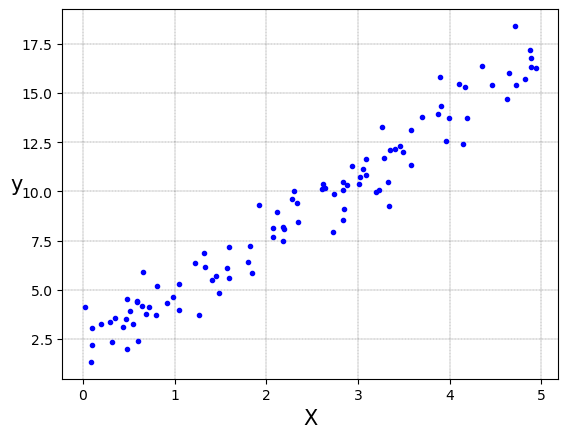

In [7]:
# 'b.' - format string
# 'b' - the points are blue
# '.' - the marker is dot
plt.plot(X, y, 'b.')
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15, rotation=0)
plt.grid(color='k', linestyle='--', linewidth=0.2)

In [9]:
# we need to add a column of ones to X dedicated to X0
# np.ones(shape) - return a new array of given shape filled with ones
add_ones = np.ones((len(X),1))

In [11]:
# np.hstack(tup) - stack array in sequence horizontally
X_data = np.hstack((add_ones,X))

In [12]:
X_data.shape

(100, 2)

In [13]:
def GradientDescent(X, y, theta, lr=0.01, n_iters=10000):
    m = len(y)
    costs = []
    for _ in range(n_iters):
        y_hat = np.dot(X, theta)
        theta = theta - (1/m) * lr * (np.dot(X.T, (y_hat-y))) 
        # np.square() - return the element-wise square of the input
        # np.sum(a, axis=None) - the default axis=None will sum all of the elements of the
        # input array a 
        cost = (1/2/m) * np.sum(np.square(y_hat - y)) 
        costs.append(cost)
    return theta, costs

In [14]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.cost = np.zeros(self.n_iters)
    def train(self, X, y):
        self.theta = np.random.randn(X.shape[1], 1)
        thetas, costs = GradientDescent(X, y, self.theta, self.lr, self.n_iters) 
        self.theta = thetas
        self.cost = costs
        return self
    def predict(self, X):
        return np.dot(X, self.theta)

thetas:  [[1.94817005]
 [2.95794404]]


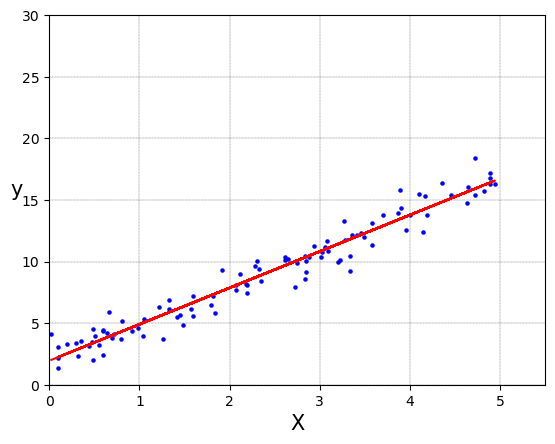

In [15]:
# initialize the model 
model = LinearRegression(lr = 0.01, n_iters=10000)
model.train(X_data, y)
print('thetas: ', model.theta)
y_pred = model.predict(X_data)
plt.scatter(X, y, s=5, color='b')
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15, rotation=0)
plt.plot(X, y_pred, color='r')
_ =plt.axis([0,5.5,0,30])
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.show()